### K-mans clustering 
- Why K-means?
    - The most popular clustering algorithm in existence
    - It’s relatively simple, intuitive, and easy to conceptualize some Machine learning concepts
    - Choosing K can be done either intuitively, the Silhouette method, the Elbow method
- How it works?
    - Once K (any random number) is determined we select K random points from out dataset and use these points as centroids.
    - Compute the cost function of the distance from the centroid
    - Choose closest and move the controid to the point
    - Repeat computing cost function of the distance / moving the controid until centoid is no longer change
    - The ideal number of cluster is obtained when teh additionof new cluster doesn't significantly increases the cost function
### Facts About Correlation
1) The order of variables in a correlation is not important. <br />
2) Correlations provide evidence of association, not causation. <br />
3) r has no units and does not change when the units of measure of x, y, or both
are changed. <br />
4) Positive r values indicate positive association between the variables, and
negative r values indicate negative associations. <br />
5) The correlation r is always a number between -1 and 1.  <br />

In [26]:
# K-means - clustering
# Import basic necessities
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [27]:
file_name ="data/outlier_removed_data.csv"

In [28]:
cleaned_df = pd.read_csv(file_name)
cleaned_df.head()

,GENDER,CREDIT_SCORE,AGE,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,MODEL_SPARK,MODEL_SPTAGE,MODEL_TAURUS,MODEL_TERRAIN,MODEL_TOWN,MODEL_TRAVERSE,MODEL_TRAX,MODEL_VERSA,MODEL_WRANGLER,SCORE_BUCKET
0,0,824,32,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,824,29,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,631,28,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
3,0,666,28,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,0,671,39,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


In [29]:
# Remove creadit score outcome target from fetures data
y = cleaned_df['CREDIT_SCORE']
X = cleaned_df.drop(columns='CREDIT_SCORE')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


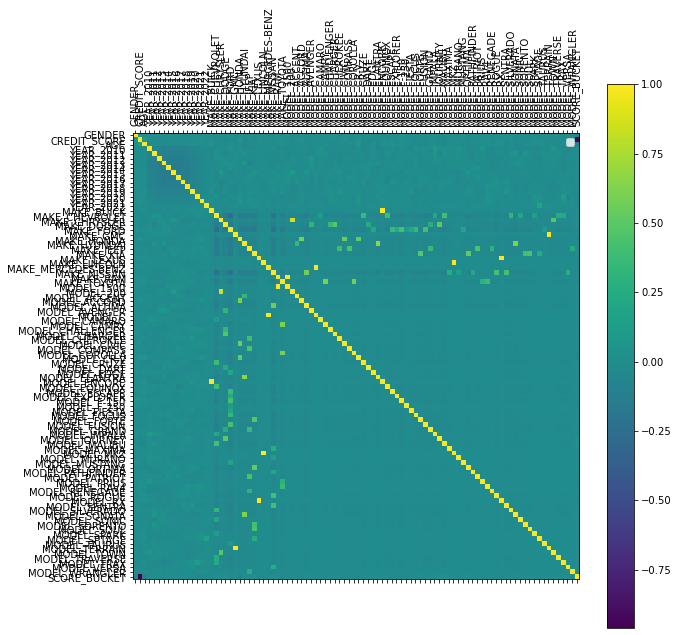

In [30]:
# Let's plot corr- high values? The realtionship with vehicle and credit score is high
import matplotlib.pyplot as plt
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(cleaned_df)

<AxesSubplot:ylabel='Frequency'>

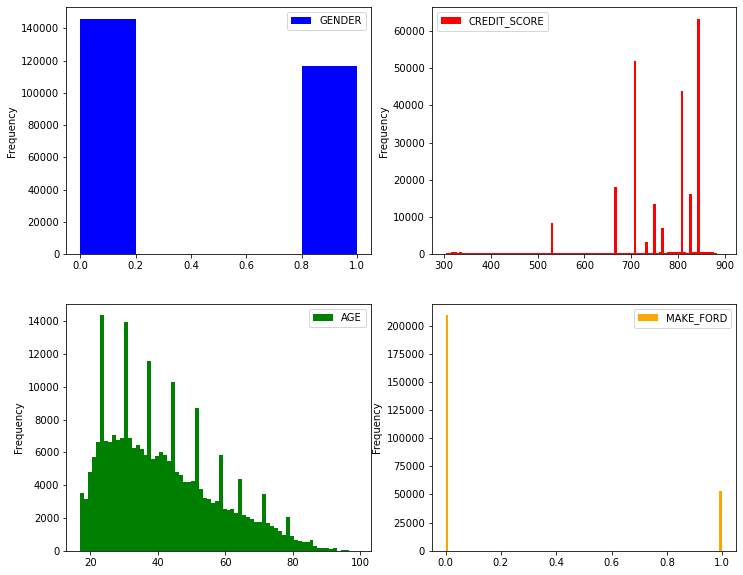

In [31]:
# An Example : let's take an individual categories how it is distributed
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
cleaned_df.plot(kind='hist', y='GENDER', bins=5, color='b', ax=axes[0][0])
cleaned_df.plot(kind='hist', y='CREDIT_SCORE', bins=100, color='r', ax=axes[0][1])
cleaned_df.plot(kind='hist', y='AGE', bins=70, color='g', ax=axes[1][0])
cleaned_df.plot(kind='hist', y='MAKE_FORD', bins=100, color='orange', ax=axes[1][1])

In [32]:
# Apply the Elbow Method using Sum Squred Distances

In [33]:
from sklearn.cluster import KMeans
sum_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
    km = km.fit(X)
    sum_distances.append(km.inertia_)


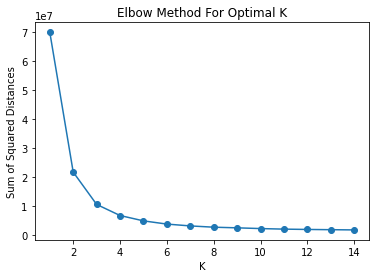

In [34]:
plt.plot(K, sum_distances, marker='o')
plt.xlabel("K")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method For Optimal K")
plt.show()

In [35]:
km.cluster_centers_

array([[4.35993111e-01, 3.69913892e+01, 6.65901263e-02, ...,
        1.23995408e-02, 3.09988519e-03, 1.98874856e+00],
       [4.45558502e-01, 7.31134405e+01, 4.59893934e-02, ...,
        9.94365264e-03, 3.14882333e-03, 1.50687769e+00],
       [4.52180918e-01, 2.49750547e+01, 6.20612268e-02, ...,
        1.40982852e-02, 3.82667741e-03, 1.94058580e+00],
       ...,
       [4.51128450e-01, 2.03109741e+01, 6.99303633e-02, ...,
        1.29205470e-02, 4.61448108e-03, 1.90590654e+00],
       [4.54010370e-01, 3.35278647e+01, 6.71742888e-02, ...,
        1.08375765e-02, 3.03638997e-03, 1.48395385e+00],
       [4.57483290e-01, 6.52641674e+01, 5.96919500e-02, ...,
        1.48793955e-02, 4.64981110e-03, 1.63225806e+00]])

In [36]:
km.labels_

array([12,  8,  8, ..., 12, 13,  2])

In [37]:
# Using K-means
from sklearn.cluster import KMeans
# we set k=3 for his first trial, which we run for 10 times (n_init) and run 500 iterations
k_model = KMeans(n_clusters=6, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km=k_model.fit_predict(X)
print(y_km)

[1 1 1 ... 1 3 0]


In [38]:
#cleaned_df['SCORE_BUCKET'] = k_model.labels_ - Created in a seprate file
cleaned_df.head()

,GENDER,CREDIT_SCORE,AGE,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,MODEL_SPARK,MODEL_SPTAGE,MODEL_TAURUS,MODEL_TERRAIN,MODEL_TOWN,MODEL_TRAVERSE,MODEL_TRAX,MODEL_VERSA,MODEL_WRANGLER,SCORE_BUCKET
0,0,824,32,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,824,29,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,631,28,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
3,0,666,28,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
4,0,671,39,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


In [39]:
#get the predictions
y_k_model=k_model.fit_predict(cleaned_df)
print(y_k_model)

[5 5 1 ... 4 2 2]


In [25]:
cleaned_df.to_csv("data/dummified_data.csv", index=False)